<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Notebook 1</p></tp>
            <tp><p style="font-size:150%;text-align:center">Ambientes de tarea</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

## Objetivo

La representación de problemas es uno de los temas iniciales en la historia de la inteligencia artificial. Gracias a una mirada en perspectiva, hoy podemos definir una estructura común para la representación de muchos problemas, en lo que se conoce como un **ambiente de tarea**. El objetivo de este notebook es permitir al estudiante ganar familiaridad con la implementación en Python de un ambiente de tarea particular, que usaremos para resolver el problema de las ocho reinas, pero que se podrá adaptar luego a otros problemas.

Adaptado de (Russell & Norvig, 2020), sección 3.1.1

## Secciones

Desarrollaremos la explicación de la siguiente manera:

1. [Presentación del problema de las ocho reinas](#presentacion).
2. [Implementación del ambiente de tarea en Python](#implementacion).


## Problema de ejemplo <a class="anchor" id="presentacion"></a>

El siguiente problema se conoce como las *ocho reinas*, el cual consiste en poner ocho reinas en un tablero de ajerdez de tal manera que ninguna pueda atacar a las demás. 

En el siguiente tablero hay siete reinas. ¿Es esta una situación admisible? ¿Cuál puede ser una solución al problema?

<img src="./imagenes/ocho_reinas.png" width="230">

¿Cómo definimos el *entorno*? Este puede representarse como una colección de estados, donde cada uno de ellos representa el tablero con cero o más reinas. Por su parte, las acciones del agente consisten en poner una reina en una casilla vacía del tablero (aunque no todas las acciones serán *aplicables* dado un estado del tablero).

**Ejercicio 1:**

De acuerdo con la formulación de entornos hecha durante la clase, ¿cuáles características considera usted que  tiene el *entorno* en este problema?

| Opción 1 | Opción 2 |
| :---: | :---: |
| $\checkmark$ Completamente observable | Parcialmente observable|
| $\checkmark$ Agente único | Multiagente |
| $\checkmark$ Determinista | Estocástico |
| Episódico    | $\checkmark$ secuencial  |
| $\checkmark$ Estático     | dinámico    |
| $\checkmark$ Discreto     | continuo    |
| $\checkmark$ Conocido     | desconocido |

----

La **definición formal** del problema se hace con base en la definición de las siguientes características:

* **Estado inicial**: Situación del entorno desde la cual el agente comienza a resolver el problema. En nuestro ejemplo, el estado inicial es el tablero vacío.

* **Posibles acciones**: Descripción de las posibles acciones del agente en el entorno, dado un estado `s`. Estas acciones se llaman las *acciones aplicables* en `s`. En nuestro problema, dado un estado con $k$ reinas ($k<8$), las acciones aplicables son poner una reina en una de las casillas vacías que no es atacada por ninguna de las otras reinas.

* **Función de transiciones**: Descripción del entorno que resulta de la ejecución de una de las acciones del agente. Junto con el estado inicial y las posibles acciones, la función de transiciones define el *espacio de estados* del problema. En nuestro ejemplo, la función toma un tablero con $k$ reinas ($k<8$) y devuelve un tablero con $k+1$ reinas.

* **Prueba de satisfacción del objetivo**: Es una prueba que permite determinar si un estado es un *estado objetivo* en el cual se resuelve el problema. Esta prueba puede contener una colección de estados objetivo (para chequear si el estado es uno de ellos) o puede estar dada en términos de una condición explícita que debe cumplir un estado. En nuestro ejemplo usaremos una condición explícita. Esto es, la prueba debe verificar la condición de si un tablero dado contiene ocho reinas en el cual niguna puede atacar a otra.

* **Función de costo**: Determina el costo numérico asociado a cada camino entre estados. En nuestro ejemplo, dicha función no es esencial, pero consideraremos que cada acción tiene el mismo costo, de tal manera que la función de costo es la cantidad de acciones realizadas (siempre devolverá el valor de 8 en cualquier solución). 


## Implementación del problema <a class="anchor" id="implementacion"></a>

Implementaremos el problema de las ocho reinas mediante una clase en Python.

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import numpy as np
import copy

%matplotlib inline

In [18]:
class OchoReinas:
    
    def __init__(self):
        self.estado_inicial = np.matrix([[0]*8]*8)
    
    def pintar_estado(self, estado):
        # Dibuja el tablero correspondiente al estado
        # Input: estado, que es una 8-lista de 8-listas
        fig, axes = plt.subplots()

        # Dibujo el tablero
        step = 1./8
        offset = 0.001
        tangulos = []

        # Borde del tablero
        tangulos.append(patches.Rectangle((0,0),0.998,0.998,\
                                          facecolor='cornsilk',\
                                         edgecolor='black',\
                                         linewidth=2))

        # Creo los cuadrados oscuros en el tablero
        for i in range(4):
            for j in range(4):
                tangulos.append(
                    patches.Rectangle(
                                      (2 * i * step, 2 * j * step), \
                                       step - offset, \
                                       step,\
                                       facecolor='lightslategrey')\
                                       )
                tangulos.append(
                    patches.Rectangle(
                                      (step + 2 * i * step, (2 * j + 1) * step), \
                                       step - offset, \
                                       step,\
                                       facecolor='lightslategrey')\
                                       )

        # Creo las líneas del tablero
        for j in range(8):
            locacion = j * step
            # Crea linea horizontal en el rectangulo
            tangulos.append(patches.Rectangle(*[(0, locacion), 1, 0.008],\
                    facecolor='black'))
            # Crea linea vertical en el rectangulo
            tangulos.append(patches.Rectangle(*[(locacion, 0), 0.008, 1],\
                    facecolor='black'))

        for t in tangulos:
            axes.add_patch(t)

        # Cargando imagen de la reina
        arr_img = plt.imread("./imagenes/8Reinas/reina.png", format='png')
        imagebox = OffsetImage(arr_img, zoom=0.048)
        imagebox.image.axes = axes
    
        offsetX = 0.065
        offsetY = 0.065
        for i in range(8):
            for j in range(8):
                if estado[j, i] == 1:
                    # print("Reina en (" + str(i) + ", " + str(j) + ")")
                    Y = 7 - j
                    X = i
                    # print("(" + str(X) + ", " + str(Y) + ")")
                    ab = AnnotationBbox(
                        imagebox, 
                        [(X*step) + offsetX, (Y*step) + offsetY], 
                        frameon=False)
                    axes.add_artist(ab)
        
        axes.axis('off')
        return axes
    
    def acciones_aplicables(self, estado):
        # Devuelve una lista de parejas que representan
        # las casillas vacías en las que es permitido
        # poner una reina adicional
        # Input: estado, que es una np.matrix(8x8)
        # Output: lista de indices (x,y)
        indices = [(x, y) for x in range(8) for y in range(8)]
        indices_bloqueados = []
        # Chequeamos primero que haya menos de ocho reinas
        if estado.sum() >= 8:
            return []
        else:
            # Bloqueamos índices por cada reina encontrada
            for x in range(8):
                for y in range(8):
                    if estado[y, x]==1:
                        #print("Reina encontrada en", x, y)
                        # Encuentra una reina
                        # Elimina la fila
                        #print("Bloqueando filas...")
                        indices_bloqueados += [(i, y) for i in range(8)]
                        # Elimina la columna
                        #print("Bloqueando columnas...")
                        indices_bloqueados += [(x, i) for i in range(8)]
                        # Elimina las diagonales \
                        # print("\nBloqueando diagonales...")
                        dif = np.abs(x-y)
                        offset_x = 0
                        offset_y = 0
                        for i in range(1, 8 - dif):
                            if (y + i) == 8:
                                offset_x = - (x + i)
                                offset_y = dif
                            if (x + i) == 8:
                                offset_x = dif
                                offset_y = - (y + i)
                            xB = (x + i + offset_x) % 8
                            yB = (y + i + offset_y) % 8
                            # print("(" + str(xB) + ", " + str(yB) + ")", end="")
                            indices_bloqueados.append((xB, yB))
                        # Elimina las transversales /
                        # print("\nBloqueando transversales...")
                        dif1 = np.abs((7-x)-y)
                        # print("\n Dif", dif1)
                        offset_x = 0
                        offset_y = 0
                        for i in range(1, 8 - dif1):
                            xB = (x + i + offset_x) % 8
                            yB = (y - i + offset_y) % 8
                            # print("(" + str(xB) + ", " + str(yB) + ")", end="")
                            indices_bloqueados.append((xB, yB))
                            if yB == 0:
                                offset_x = - (x + i + 1)
                                offset_y = x + i + 1
                            if xB == 7:
                                offset_x = y - (i + 1) - 7
                                offset_y = 8 - (y - i)

            return list(set(indices) - set(indices_bloqueados))

    def transicion(self, estado, indices):
        # Devuelve el tablero incluyendo una reina en el indice
        # Input: estado, que es una np.matrix(8x8)
        #        indice, de la forma (x,y)
        # Output: estado, que es una np.matrix(8x8)
        
        s = copy.deepcopy(estado)
        x = indices[0]
        y = indices[1]
        s[y, x] = 1
        return s
    
    def test_objetivo(self, estado):
        # Devuelve True/False dependiendo si el estado
        # resuelve el problema
        # Input: estado, que es una np.matrix(8x8)
        # Output: True/False
        # print("Determinando si hay exactamente ocho reinas...")
        num_reinas = estado.sum()
        if num_reinas != 8:
            # print("Numero incorrecto de reinas!")
            return False
        else:
            # print("Determinando si las reinas no se atacan...")
            # print("Buscando reina por fila...")
            filas = [i[0] for i in estado.sum(axis=1).tolist()]
            if any(i>1 for i in filas):
                # print("Dos reinas en la misma fila!")
                return False
            else:
                # print("Buscando reina por columna...")
                columnas = estado.sum(axis=0).tolist()[0]
                if any(j>1 for j in columnas):
                    # print("Dos reinas en la misma columna!")
                    return False
                else:
                    for x in range(8):
                        for y in range(8):
                            if estado[y, x]==1:
                                # print("Reina encontrada en (" + str(x) + ", " + str(y) + ")")
                                # print("Buscando otra reina en la misma diagonal...")
                                dif = np.abs(x-y)
                                offset_x = 0
                                offset_y = 0
                                for i in range(1, 8 - dif):
                                    if (y + i) == 8:
                                        offset_x = - (x + i)
                                        offset_y = dif
                                    if (x + i) == 8:
                                        offset_x = dif
                                        offset_y = - (y + i)
                                    xB = (x + i + offset_x) % 8
                                    yB = (y + i + offset_y) % 8
                                    if estado[yB, xB] == 1:
                                        #print("Dos reinas en la misma diagonal!")
                                        return False
            
                                # print("Buscando otra reina en la misma transversal...")
                                dif1 = np.abs((7-x)-y)
                                # print("\n Dif", dif1)
                                offset_x = 0
                                offset_y = 0
                                for i in range(1, 8 - dif1):
                                    xB = (x + i + offset_x) % 8
                                    yB = (y - i + offset_y) % 8
                                    # print("(" + str(xB) + ", " + str(yB) + ")", end="")
                                    if estado[yB, xB]==1:
                                        # print("Dos reinas en la misma transversal!")
                                        return False
                                    if yB == 0:
                                        offset_x = - (x + i + 1)
                                        offset_y = x + i + 1
                                    if xB == 7:
                                        offset_x = y - (i + 1) - 7
                                        offset_y = 8 - (y - i)
                                        
        return True 
    
    def costo(self, estado, accion):
        return 1


Este es el estado inicial:


<AxesSubplot:>

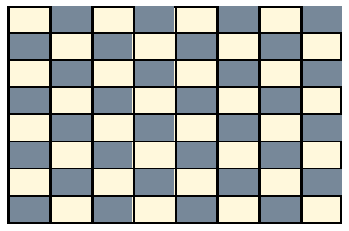

In [5]:
prob = OchoReinas()
s = prob.estado_inicial
print("Este es el estado inicial:")
prob.pintar_estado(s)

**Ejercicio 2:**

Considere el siguiente estado:

<AxesSubplot:>

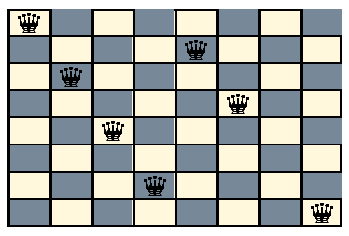

In [14]:
s1 = prob.transicion(s,(0,0))
s1 = prob.transicion(s1,(1,2))
s1 = prob.transicion(s1,(2,4))
s1 = prob.transicion(s1,(3,6))
s1 = prob.transicion(s1,(4,1))
s1 = prob.transicion(s1,(5,3))
s1 = prob.transicion(s1,(7,7))
prob.pintar_estado(s1)

* ¿Cuáles son las acciones aplicables en `s1`?

In [15]:
prob.acciones_aplicables(s1)

[(6, 5)]

* Construya y dibuje un estado `s2` con una de las acciones aplicables en `s1`.


<AxesSubplot:>

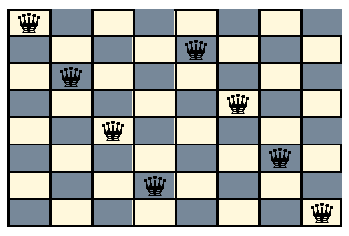

In [16]:
s2 = prob.transicion(s1, (6, 5)) 
prob.pintar_estado(s2)

* Use la prueba de satisfacción de objetivo `test_objetivo()` para determinar si `s2` resuelve el problema.

In [22]:
prob.test_objetivo(s2)

False

---

**Ejercicio 3:**

Considere el siguiente estado:

<AxesSubplot:>

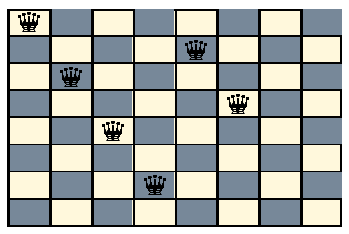

In [25]:
s1 = prob.transicion(s,(0,0))
s1 = prob.transicion(s1,(1,2))
s1 = prob.transicion(s1,(2,4))
s1 = prob.transicion(s1,(3,6))
s1 = prob.transicion(s1,(4,1))
s1 = prob.transicion(s1,(5,3))
prob.pintar_estado(s1)

* ¿Cuáles son las acciones aplicables en `s1`?

In [26]:
prob.acciones_aplicables(s1)

[(6, 5)]

* A partir de `s1` construya y dibuje un estado `s2` con 7 damas, usando las acciones aplicables de `s1`.

<AxesSubplot:>

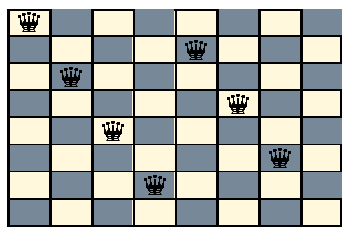

In [28]:
s2 = prob.transicion(s1,(6,5))
prob.pintar_estado(s2)


* ¿Cuáles son las acciones aplicables a partir de `s2`?

In [29]:
prob.acciones_aplicables(s2)

[]

---

**Ejercicio 4:**

Considere el siguiente estado:

<AxesSubplot:>

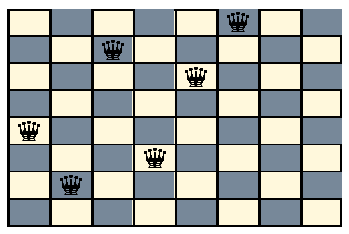

In [30]:
s1 = prob.transicion(s,(0,4))
s1 = prob.transicion(s1,(1,6))
s1 = prob.transicion(s1,(2,1))
s1 = prob.transicion(s1,(3,5))
s1 = prob.transicion(s1,(4,2))
s1 = prob.transicion(s1,(5,0))
prob.pintar_estado(s1)

* ¿Cuáles son las acciones aplicables en `s1`?

In [31]:
prob.acciones_aplicables(s1)

[(6, 3), (7, 7), (7, 3)]

* A partir de `s1` construya y dibuje un estado `s2` con 7 damas, usando las acciones aplicables de `s1`.


[(7, 7)]

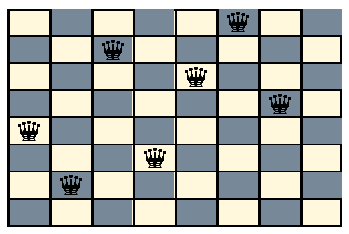

In [38]:
s2 = prob.transicion(s1, (6, 3))
prob.pintar_estado(s2)
prob.acciones_aplicables(s2)

* A partir de `s2` construya y dibuje un estado `s3` con 8 damas, usando las acciones aplicables de `s2`.


<AxesSubplot:>

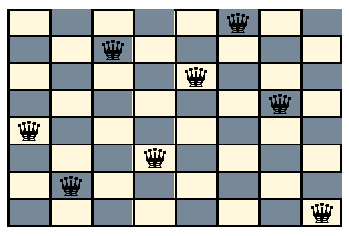

In [39]:
s2 = prob.transicion(s2, (7, 7))
prob.pintar_estado(s2)

* ¿Acaso `s3` pasa la prueba de satisfacción del objetivo?

In [37]:
prob.test_objetivo(s2)

True

---

## En este notebook usted aprendió

* Cómo definir formalmente un problema e implementar el ambiente de tarea en python.